Just do it, correct any mistakes, and eventually you will succeed!

That is the main idea of ​​a very important algorithm in Machine Learning - the Perceptron Learning Algorithm or PLA algorithm.

In this notebook, I will into the first algorithm in Classification task. This algorthims is a basis for many other algorithms in Machine Learning (like Neural Networks, SVM, etc).

# Introduction

Perceptron is a Classification algorithm for the simplest case: there are only two classes (the problem with only two classes is called binary classification) and also only works in a very specific case. However, this platform chooses the most important area of ​​Machine Learning, Neural Networks and then Deep Learning. (Why it is called Neural Networks - that is, nerve networks - you will find at the end of the notebook).

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Suppose we have two labeled data sets shown in Figure on the left below. Our two classes are the set of blue points and the set of red points. The problem is: from the data of two given labeled sets, build a classifier so that when there is a new gray triangular data point, we can predict the color ( its label).

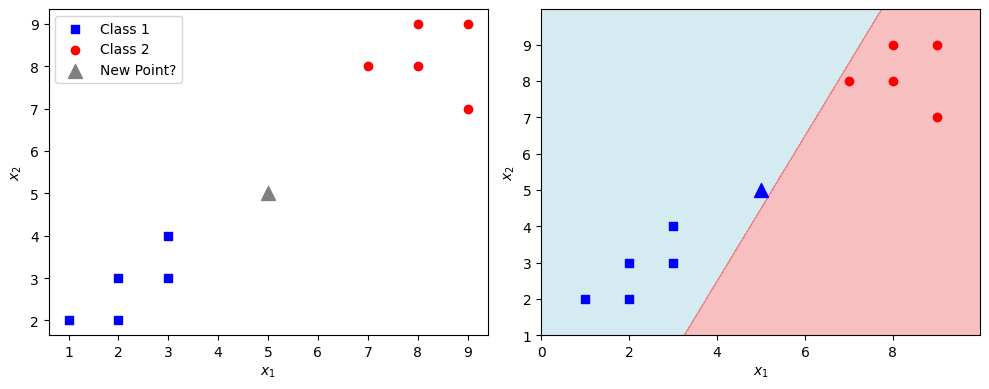

In [9]:
# Sample data for two classes
X = np.array([
    [1, 2], [2, 3], [3, 3], [2, 2], [3, 4],  # Class 1 (blue squares)
    [7, 8], [8, 8], [9, 7], [9, 9], [8, 9],  # Class 2 (red circles)
])

y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Create a classifier
clf = Perceptron(max_iter=1000, tol=1e-3, random_state=0)
clf.fit(X, y)

# Create a mesh grid for plotting decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict classifications over the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 4))

# Subplot 1: Data points without decision boundary
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', marker='s', label="Class 1")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='o', label="Class 2")
plt.scatter(5, 5, c='gray', marker='^', s=100, label="New Point?")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()

# Subplot 2: Data points with decision boundary
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, cmap=ListedColormap(('lightblue', 'lightcoral')), alpha=0.5)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', marker='s')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='o')
plt.scatter(5, 5, c='blue', marker='^', s=100)  # New point classified in red region
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()


In another term, we want to find territory (or line) that separates the two classes, so that for each new point, we only need to determine which class it belongs to and then decide whether it belongs to that class. To find the territory of each class, we need to find the boundary between these two territories. So the classification problem can be considered as the problem of finding boundaries between classes. And the simplest boundary in two-dimensional space is a straight line, in three-dimensional space it is a plane, in multi-dimensional space it is a hyperplane (I call these boundaries flat lines). These flat boundaries are considered simple because they can be represented mathematically by a simple linear function. Of course, we are assuming that there exists a flat line to be able to separate the territories of two classes. 

Figure on the right illustrates a straight line dividing two classes in the plane. The part with a blue background is considered the territory of the blue class, the part with a red background is considered the territory of the red class. In this case, the new triangular data point is classified into the blue class.

### Perceptron in mathematics

The Perceptron problem is stated as follows: Given two labeled classes, find a plane such that all points belonging to class 1 lie on one side of the plane, and all points belonging to class 2 lie on the other side of the plane. Assuming that such a plane exists.

If a plane exists that separates the two classes, then the two classes are said to be linearly separable. Classification algorithms that generate boundaries that are planes are collectively called Linear Classifiers.

# Perceptron Learning Algorithm

Similar to the iterative algorithms in K-means Clustering and Gradient Descent, the basic idea of ​​PLA is that starting from a certain predicted solution, through each iteration, the solution will be updated to a better position. This update is based on decreasing the value of a certain loss function.

Assume $X = [x_1, x_2, ..., x_n] \in \mathbb{R}^{n \times d}$ is the input data, $Y = [y_1, y_2, ..., y_n] \in \mathbb{R}^{n}$ is the label data, and $W = [w_1, w_2, ..., w_d] \in \mathbb{R}^{d}$ is the weight vector. If $y_i = 1$, then $x_i$ belongs to class 1 (blue) and if $y_i = -1$, then $x_i$ belongs to class 2 (red).

At one point, suppose we find a boundary that is a plane line with equation:

$$f_w(\vec{x}) = w_1x_1 + w_2x_2 + ... + w_dx_d + w_0 \\ = \vec{w}^T\hat{\vec{x}}= 0$$

Where $\hat{\vec{x}}$ is the augmented vector $\hat{\vec{x}} = [1, x_1, x_2, ..., x_d]$, and $w_0$ is the bias term. Same as Linear Regression, from here when say $\vec{x}$

For simplicity, let's work with the case where each data point has dimension $d = 2$. Assume that the line $\vec{w_1}\vec{x_1} + \vec{w_2}\vec{x_2} + w_0 = 0$ separates the two classes like the figure below:

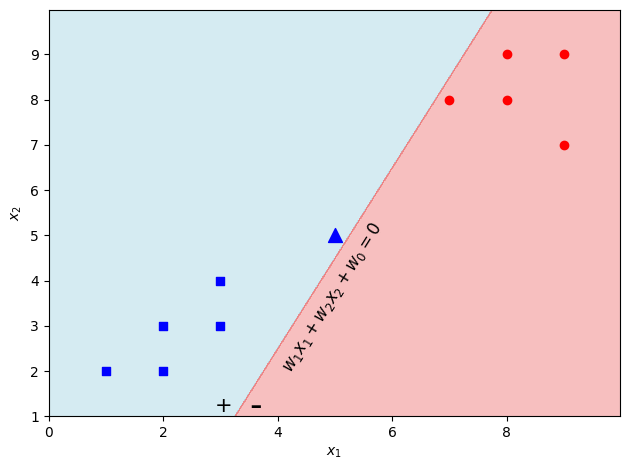

In [32]:
plt.contourf(xx, yy, Z, cmap=ListedColormap(('lightblue', 'lightcoral')), alpha=0.5)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', marker='s')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='o')
plt.scatter(5, 5, c='blue', marker='^', s=100)  # New point classified in red region
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Adding the equation and signs
plt.text(4, 2, "$w_1 x_1 + w_2 x_2 + w_0 = 0$", fontsize=12, rotation=58)
plt.text(2.9, 1.1, "+", fontsize=15, color="black")
plt.text(3.5, 1, "-", fontsize=25, color="black")

plt.tight_layout()
plt.show()

Note that points on the same side of this line will give the function $f_w(x)$ the same sign. By simply changing the sign of $\vec{w}$ if necessary, we can assume that points in the blue half-plane have a positive sign (+), and points in the red half-plane have a negative sign (-). These signs are also equivalent to the labels y of each class. So if $\vec{w}$ is a solution to the Perceptron problem, for a new unlabeled data point $x$, we can determine its class by a simple operation as follows:

$$\text{label}(x) = 1 \text{ if } \vec{w}^T\hat{x} \geq 0 \text{ else } -1$$

Or:

$$\text{label}(x) = \text{sign}(\vec{w}^T\hat{x})$$

Where $\text{sign}(x)$ is the sign function

### Loss function

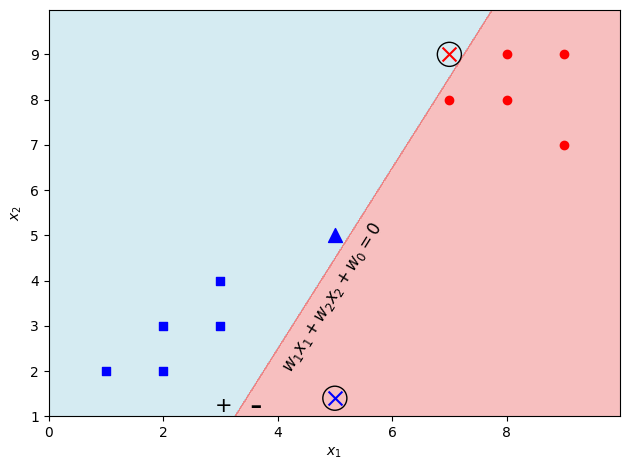

In [42]:
plt.contourf(xx, yy, Z, cmap=ListedColormap(('lightblue', 'lightcoral')), alpha=0.5)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', marker='s')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='o')
plt.scatter(5, 5, c='blue', marker='^', s=100)  # New point classified in red region
plt.scatter(7, 9, c='red', marker='x', s=100)
plt.scatter(5, 1.4, c='blue', marker='x', s=100)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Mark circle on the misclassified points
plt.scatter(7, 9, facecolors='none', edgecolors='black', s=300, linewidths=1)
plt.scatter(5, 1.4, facecolors='none', edgecolors='black', s=300, linewidths=1)

# Adding the equation and signs
plt.text(4, 2, "$w_1 x_1 + w_2 x_2 + w_0 = 0$", fontsize=12, rotation=58)
plt.text(2.9, 1.1, "+", fontsize=15, color="black")
plt.text(3.5, 1, "-", fontsize=25, color="black")

plt.tight_layout()
plt.show()

In this case, the circled points are the misclassified points. What we want is for no points to be misclassified. The simplest loss function we can think of is one that *counts* the number of misclassified points and tries to minimize this function:

$$ J_1(w) = \sum_{\vec{x}_i \in n} (-y_i \text{sgn}(\vec{w}^T \vec{x}_i)) $$


Where $n$ is set of data point got misclassified, each point $\vec{x}_i$ is misclassified so $y_i$ and $\text{sgn}(\vec{w}^T \vec{x}_i)$ have different sign. So that, when the function $J_1(w)$ is minimized, the number of misclassified points is also minimized. (equal to 0)

An important point is that this function is discrete and the derivative cannot be calculated by $\vec{x}$, so we cannot use the Gradient Descent algorithm. So we need to find another loss function that is continuous and differentiable.

Consider the following loss function:

$$ J(\vec{w}) = \sum_{\vec{x}_i \in n} -y_i \vec{w}^T \vec{x}_i $$

You can easily see that:
- If a point $\vec{x}_i$ is misclassified, then $-y_i \vec{w}^T \vec{x}_i > 0$ (more bigger).
- Min $J(\vec{w})$ is equivalent to 0 misclassified points.

=> This function penalizes misclassified points more than the previous function. This function is continuous and differentiable, so we can use the optimz algorithm to minimize it.

With any loss:
$$J(\vec{w}; \vec{x}_i, y_i) = -y_i \vec{w}^T \vec{x}_i$$

Gradient:
$$\nabla J(\vec{w}; \vec{x}_i, y_i) = -y_i \vec{x}_i$$

So our update rule is:

$$\vec{w} = \vec{w} + \eta y_i \vec{x}_i$$

Where $\eta$ is the learning rate.

Remember that, the Perceptron algorithm is a simple algorithm, so it is not guaranteed to converge. However, if the data is linearly separable, the algorithm will converge (which I will prove later even though we go randomly).

# Summary

1. Initialize $\vec{w}$ with random values.
2. For each data point $\vec{x}_i$:
    - If $\vec{x}_i$ got right label, mean $\text{sgn}(\vec{w}^T \vec{x}_i) = y_i$, do nothing
    - If $\vec{x}_i$ misclassified, update $\vec{w}$ by $\vec{w} = \vec{w} + \eta y_i \vec{x}_i$
3. Repeat step 2 until all data points are classified correctly.


# Proof of convergence

Assume that $\vec{w}^*$ is the optimal solution that separates the two classes (which data is linear separable). We can see that with any $\alpha > 0$, if $\vec{w}^*$ is the solution, then $\alpha \vec{w}^*$ is also the solution.

Example with an non-negative array $\vec{u}_{\alpha}(t) = \| \vec{w}(t) - \alpha \vec{w}^* \|_{2} ^{2}$. With $\vec{x}_i$ is misclassified, we have:

$$\vec{u}_{\alpha}(t + 1) = \| \vec{w}_{(t + 1)} - \alpha \vec{w}^* \|_{2} ^{2} \\ = \| \vec{w}_{t} + y_i \vec{x}_i - \alpha \vec{w}^* \|_{2} ^{2} \\ = \| \vec{w}_{t} - \alpha \vec{w}^* \|_{2} ^{2} + y_{i} ^2 \| \vec{x}_i \|_{2} ^{2} + 2y_i(\vec{w}_t - \alpha \vec{w}^*)^T \vec{x}_i \\ < \vec{u}_{\alpha}(t) + \| \vec{x}_i \|_{2} ^{2} + 2 \alpha y_i \vec{x}_i ^T \vec{w}^*$$

The smaller sign at the end is because of $y_i^2 = 1$ and $2 y_i \alpha \vec{x}_i ^T \vec{w}_t <0$. If:

$$\beta^2 = \max_{i = 1, 2, ..., n} \| \vec{x}_i \|_{2} ^{2}$$

$$\gamma = \min_{i = 1, 2, ..., n} y_i \vec{x}_i ^T \vec{w}^*$$

Then choose $\alpha = \frac{\beta^2}{\gamma}$, we have:

$$ 0 \leq \vec{u}_{\alpha}(t + 1) < \vec{u}_{\alpha}(t) + \beta^2 - 2 \alpha \gamma = \vec{u}_{\alpha}(t) - \beta^2$$

This means that if there is always a misclassified point, the value of $\vec{u}_{\alpha}(t)$ will decrease. And because $\vec{u}_{\alpha}(t)$ is always non-negative, it will eventually reach 0 with a rate $\beta^2 > 0$. This nonsense proof that there will be a time when all data points are classified correctly. In another word, the Perceptron algorithm will converge.

# First Neural Network (You can read more at 7. Neural Networks)

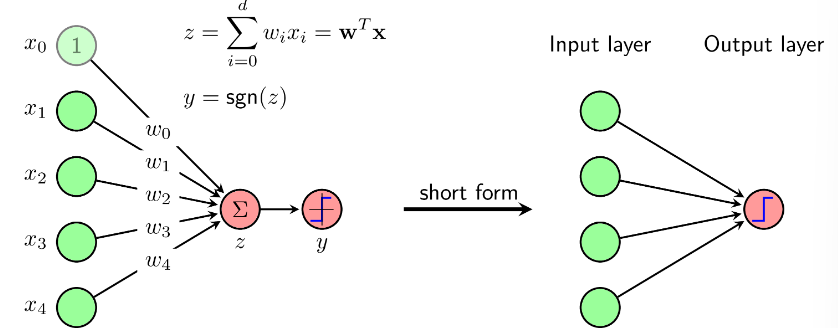

If you already read in 7. Neural Networks, you will see that the input here is the data point $\vec{x}$, the weight is $\vec{w}$, and the activation function is the sign function at y.

Node $y = \text{sgn}(z)$ is the output of network. The graph inside the circle is represent as sign function (or we usually call it activation function). The output of the network is the label of the data point.

If we replace the activation function by set $y = z$, we will have the Linear Regression model.


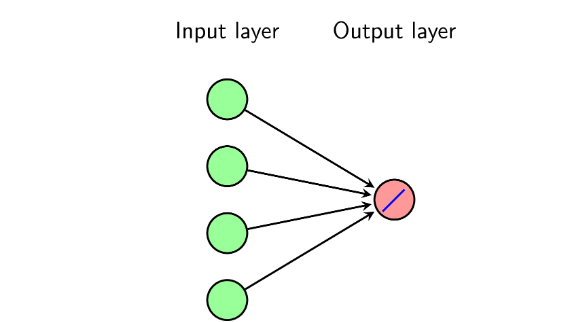

# Note

**PLA can return multiple solutions**: Because the algorithm is not guaranteed to converge, it can return multiple solutions. However, all of these solutions are correct.

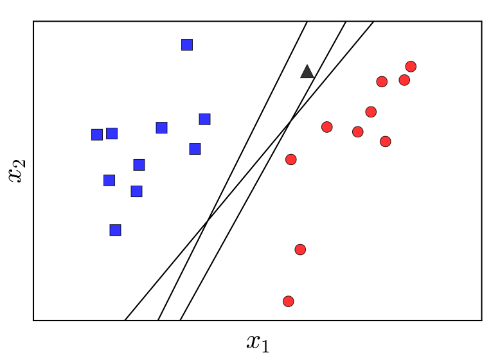

**PLA requires linear separable data**: If the data is not linear separable, the algorithm will not converge.

- To solve that ***linear*** problem, we can use the Pocket Algorithm. This algorithm is a variation of the Perceptron algorithm that can handle non-linear separable data. It look simple like this:
    - We still using the Perceptron algorithm to find the solution $\vec{w}$ like the above.
    - We will limit the loop iteration, in each time update $\vec{w}$, we will check the number of misclassified points. If the number of misclassified points is less than the previous solution, we will update the solution. This solution is stored in the pocket. Bigger, we skip it.